In [3]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
import Functions
pd.set_option('display.max_rows', None)

### Here is the basic code to get the accuracies of all 10 bivariate classifiers with all 4 kernels.

In [4]:
data = pd.read_csv("data/original_data.csv")
cols = list(data)[2:]
column_pairs = []
for i in range(len(cols)):
    for j in range(len(cols)):
        if i<j:
            column_pairs.append((cols[i],cols[j]))
accuracies = []   
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for j in range(len(kernels)):
    print("Kernel = {}".format(kernels[j]))
    accuracies.append([])
    for i in range(len(column_pairs)):
        column1,column2 = column_pairs[i]
        X,y = Functions.data_clean(data, column1, column2)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        svc = SVC(C=0.1, random_state=1, kernel=kernels[j], degree= 3)
        svc.fit(X_train, y_train)
        y_predict = svc.predict(X_test)
        accuracies[j].append(np.round(metrics.accuracy_score(y_test, y_predict),3))
        print("Accuracy of Pair - {} and {} = {}".format(column_pairs[i][0],column_pairs[i][1],accuracies[j][i]))
    print()


Kernel = linear
Accuracy of Pair - Bandwidth (Hz) and Strain (%) = 0.5
Accuracy of Pair - Bandwidth (Hz) and Stress (MPa) = 0.333
Accuracy of Pair - Bandwidth (Hz) and Efficiency (%) = 0.167
Accuracy of Pair - Bandwidth (Hz) and Power Density (W/g) = 0.167
Accuracy of Pair - Strain (%) and Stress (MPa) = 0.697
Accuracy of Pair - Strain (%) and Efficiency (%) = 0.722
Accuracy of Pair - Strain (%) and Power Density (W/g) = 0.438
Accuracy of Pair - Stress (MPa) and Efficiency (%) = 0.6
Accuracy of Pair - Stress (MPa) and Power Density (W/g) = 0.385
Accuracy of Pair - Efficiency (%) and Power Density (W/g) = 0.417

Kernel = poly
Accuracy of Pair - Bandwidth (Hz) and Strain (%) = 0.417
Accuracy of Pair - Bandwidth (Hz) and Stress (MPa) = 0.222
Accuracy of Pair - Bandwidth (Hz) and Efficiency (%) = 0.167
Accuracy of Pair - Bandwidth (Hz) and Power Density (W/g) = 0.333
Accuracy of Pair - Strain (%) and Stress (MPa) = 0.658
Accuracy of Pair - Strain (%) and Efficiency (%) = 0.5
Accuracy of Pa

In [6]:
def plot_multilabel_boundary(X,y,linear, rbf, poly, sig,column1,column2):
    h = .01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

    for i, clf in enumerate((linear, rbf, poly, sig)):
        plt.subplot(2, 2, i + 1)
        #plt.subplots_adjust(wspace=0.1, hspace=0.1) 
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        y_map = {'PZT':0, 'DEA':1, 'IPMC':2, 'SMA':3, 'SFA':4, 'TSA':5, 'SCP':6, 'EAP':7, 'SMP':8}
        for j in range(len(Z)):
            Z[j] = y_map[Z[j]]
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
        plt.show()

### Now we can plot the hyperplanes of any one of our multilabel classifers. I shall plot the one with Strain vs Stress

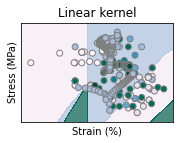

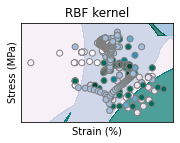

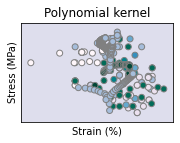

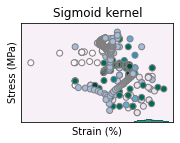

In [7]:
#Plotting a multilabel hyperplane
column1,column2 = column_pairs[4]
X,y = Functions.data_clean(data, column1, column2)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
linear = SVC(C=0.1, random_state=1, kernel='linear', degree= 3).fit(X_train, y_train)
poly = SVC(C=0.1, random_state=1, kernel='poly', degree= 3).fit(X_train, y_train)
rbf = SVC(C=0.1, random_state=1, kernel='rbf', degree= 3).fit(X_train, y_train)
sig = SVC(C=0.1, random_state=1, kernel='sigmoid', degree= 3).fit(X_train, y_train)

y_map = {'PZT':0, 'DEA':1, 'IPMC':2, 'SMA':3, 'SFA':4, 'TSA':5, 'SCP':6, 'EAP':7, 'SMP':8}
for i in range(len(y)):
    y[i] = y_map[y[i]]
plot_multilabel_boundary(X,y,linear, poly,rbf,sig,column1,column2)